In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Выбор модели

при выборе будем руководствоваться значениями MSE, R2, MAE и графиком y_test, y_pred

In [7]:
# функция для оценки качества модели
def evaluate_preds(true_values, pred_values):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

In [8]:
data = pd.read_csv('data/train_prep.csv', header=0)
data.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,0,11,0,184966.930730
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,1,16,0,300009.450063
2,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,0,0,34,7759,0,1,3,0,220925.908524
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,0,5,0,175616.227217
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2,4,0,150226.531644


In [9]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [11]:
x_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
3623,1.0,41.617018,22.186363,10.0,5,15.0,1975,0.127812,0,0,28,7287,5,1,3,0
3390,1.0,39.362294,38.530064,9.0,14,17.0,2016,0.243205,0,0,5,1564,0,0,0,0
3194,1.0,39.010836,29.010836,10.0,12,19.0,1977,0.211401,0,0,9,1892,0,0,1,0
1550,1.0,48.155074,42.155074,6.0,4,15.0,1977,0.072158,0,0,2,629,1,0,0,1
3448,2.0,46.969867,28.424174,5.0,4,5.0,1965,0.122090,0,0,29,6566,7,4,0,0


Стандартизируем данные

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [13]:
x_test = scaler.transform(x_test)

### Линейная регрессия

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

R2:	0.504
MAE:	45035.101
MSE:	4218450025.981


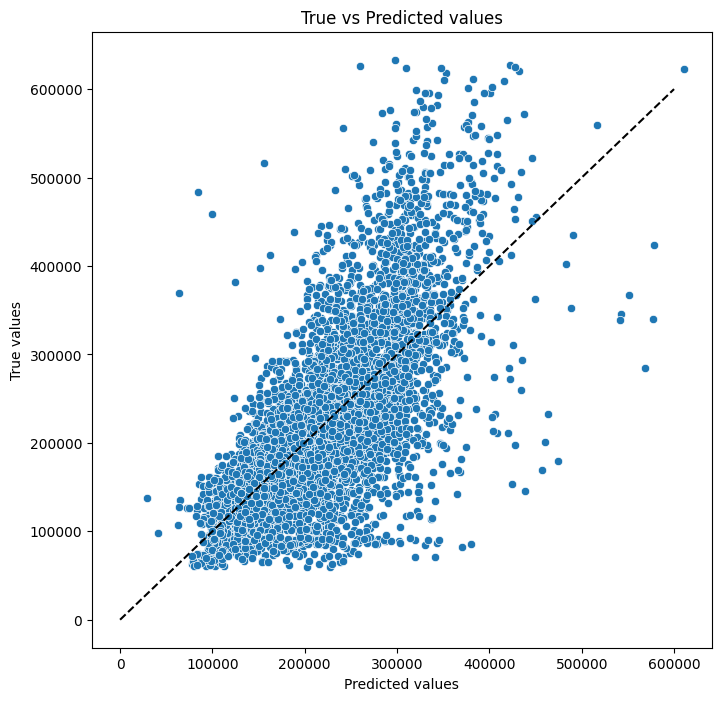

In [15]:
evaluate_preds(y_train, y_pred_train)

R2:	0.516
MAE:	45724.819
MSE:	4314432323.023


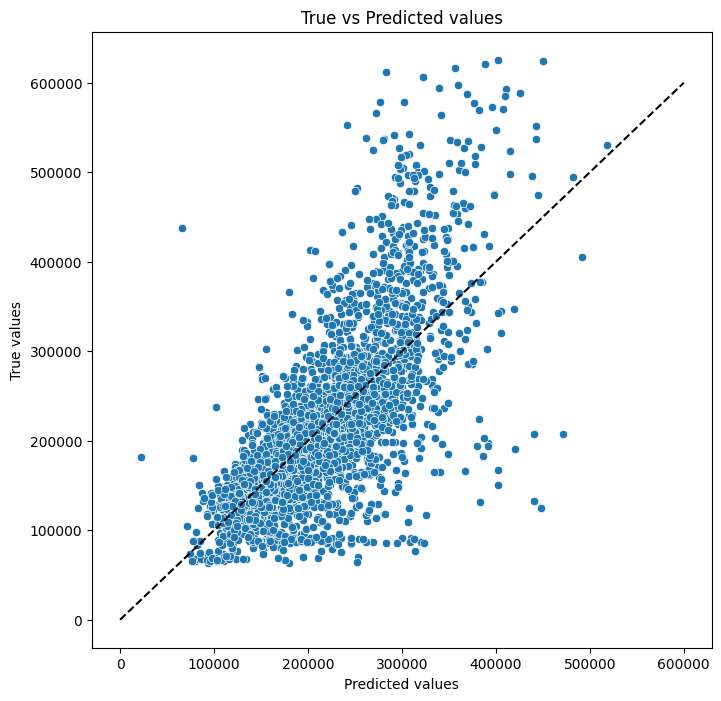

In [16]:
evaluate_preds(y_test, y_pred)

### SVR

С помощью грид серча мы выяснили что наилучшее значение С = 600 000

In [17]:
clf = SVR(C=600000)
clf.fit(x_train, y_train)

SVR(C=600000)

In [18]:
y_pred = clf.predict(x_test)

R2:	0.714
MAE:	30713.238
MSE:	2546376093.546


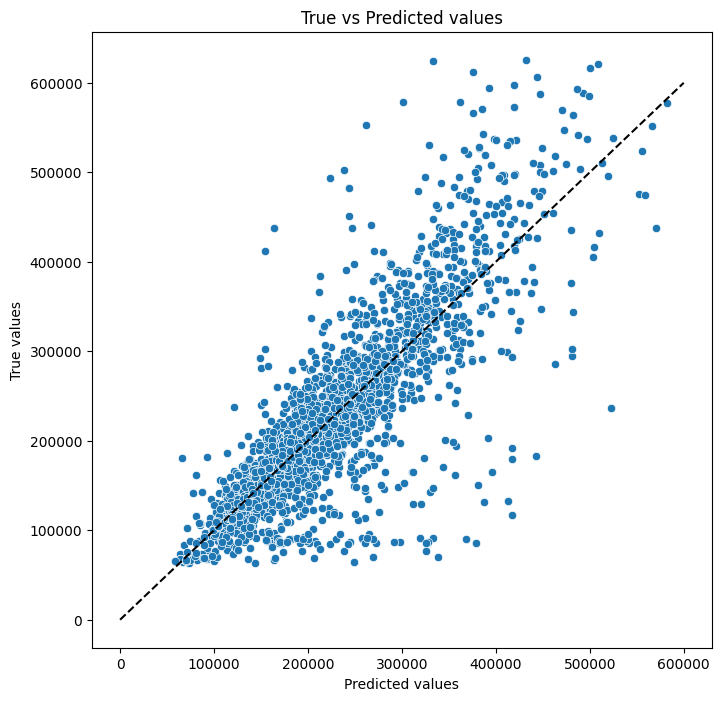

In [19]:
evaluate_preds(y_test, y_pred)

### KNN

In [20]:
neigh = np.arange(2, 19)

In [21]:
for n in neigh:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(n, r2(y_test, y_pred))

2 0.5888827229841644
3 0.6128372642523653
4 0.6301564015693893
5 0.627528384246199
6 0.6313172715489312
7 0.6309077766317273
8 0.628731795770614
9 0.6254313855958951
10 0.6318884607483326
11 0.6307155361698282
12 0.6319686642857174
13 0.630101503633744
14 0.6277472816047964
15 0.6265495204593832
16 0.6247656244980666
17 0.6245897806798721
18 0.6225850861140247


In [22]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

R2:	0.631
MAE:	36439.274
MSE:	3289220176.717


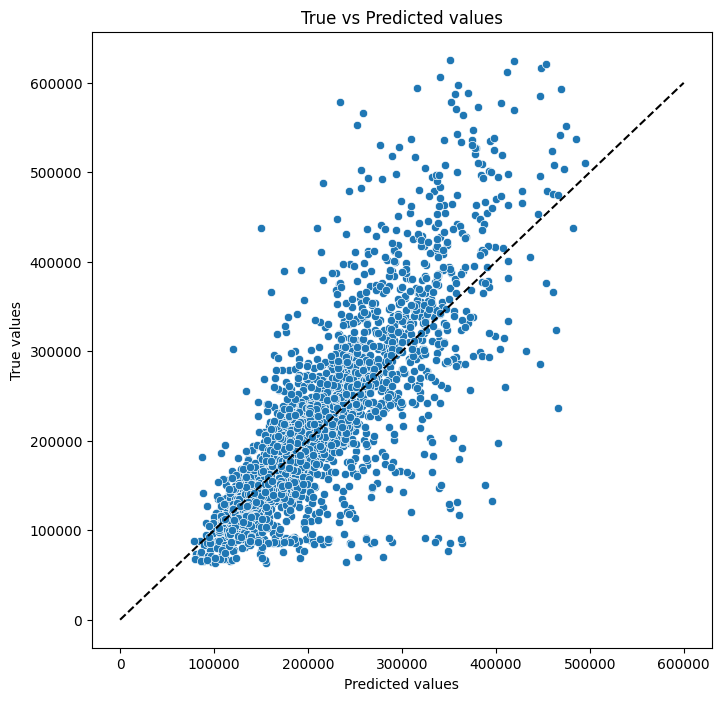

In [23]:
evaluate_preds(y_test, y_pred)

R2:	0.701
MAE:	32126.467
MSE:	2541076396.542


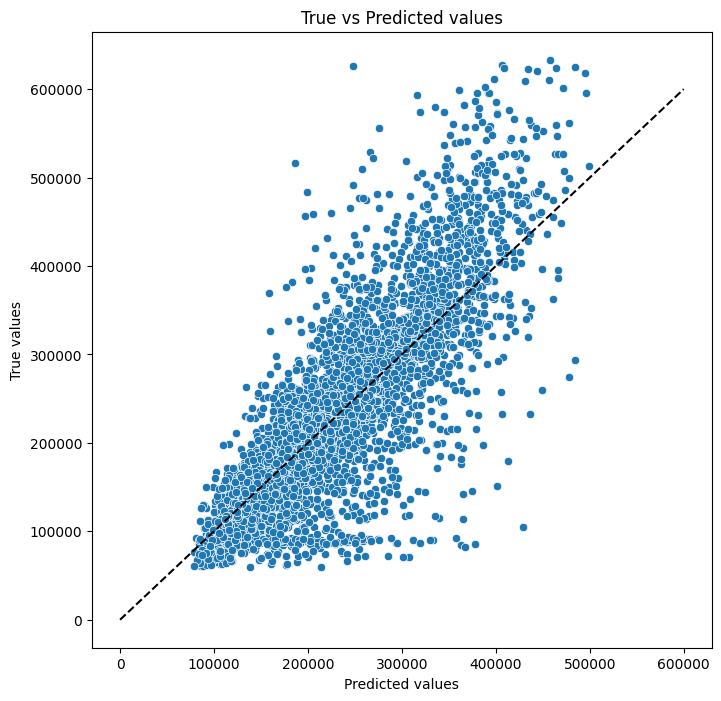

In [24]:
evaluate_preds(y_train, y_pred_train)

### Decision tree

In [25]:
depth = np.arange(2, 19)

In [26]:
for n in depth:
    knn = DecisionTreeRegressor(max_depth=n, random_state=21)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(n, r2(y_test, y_pred))

2 0.4249741016870724
3 0.5224262077776021
4 0.559715988292055
5 0.5942313088131537
6 0.607755188886567
7 0.6233855227193228
8 0.6267717422463182
9 0.6001017181971555
10 0.6072820978701648
11 0.6020589616560685
12 0.5970171893294174
13 0.5831236677609828
14 0.5510745899085949
15 0.5458004143447355
16 0.5404922683216846
17 0.5259525012300734
18 0.5232200989284852


In [27]:
knn = DecisionTreeRegressor(max_depth=8, random_state=21)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

R2:	0.627
MAE:	35710.67
MSE:	3324347586.117


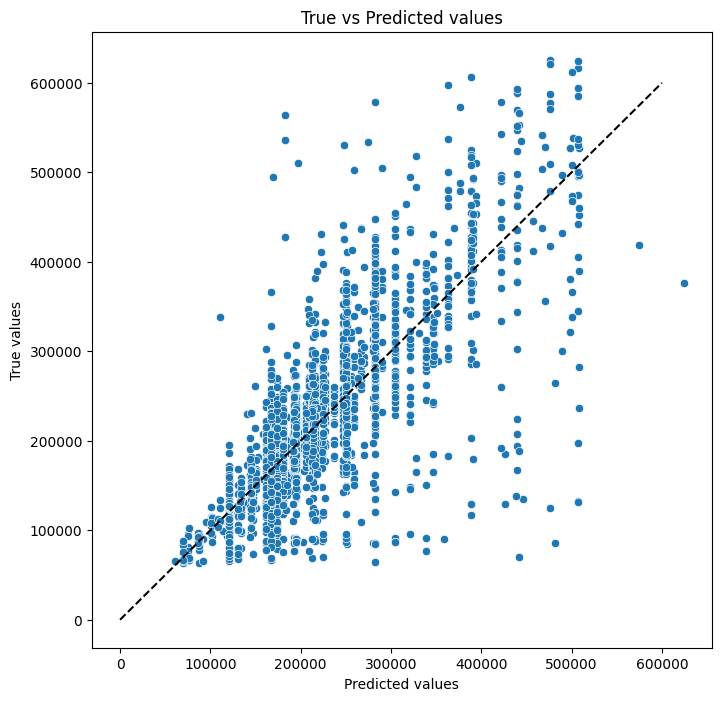

In [28]:
evaluate_preds(y_test, y_pred)

R2:	0.736
MAE:	30937.774
MSE:	2248304682.525


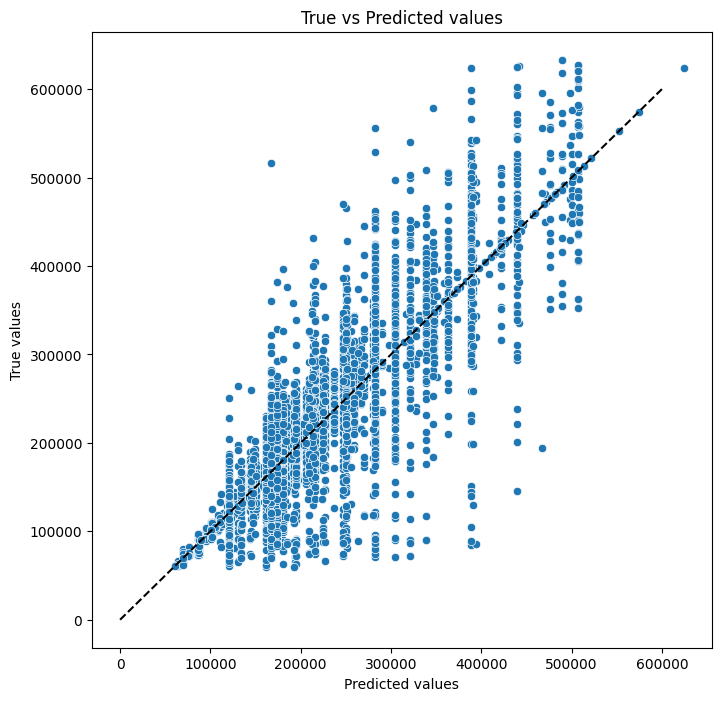

In [29]:
evaluate_preds(y_train, y_pred_train)

### Random Forest

In [30]:
parameters = [{ # 'n_estimators': [150, 200, 250],  # количество деревьев в лесу
               'max_features': np.arange(2, 9),
               'max_depth': np.arange(2, 15)}]

In [31]:
clf = GridSearchCV(estimator=RandomForestRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [32]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=21),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'max_features': array([2, 3, 4, 5, 6, 7, 8])}],
             scoring='r2')

In [33]:
clf.best_params_

{'max_depth': 14, 'max_features': 6}

In [34]:
y_pred = clf.predict(x_test)

R2:	0.747
MAE:	28844.732
MSE:	2254754663.212


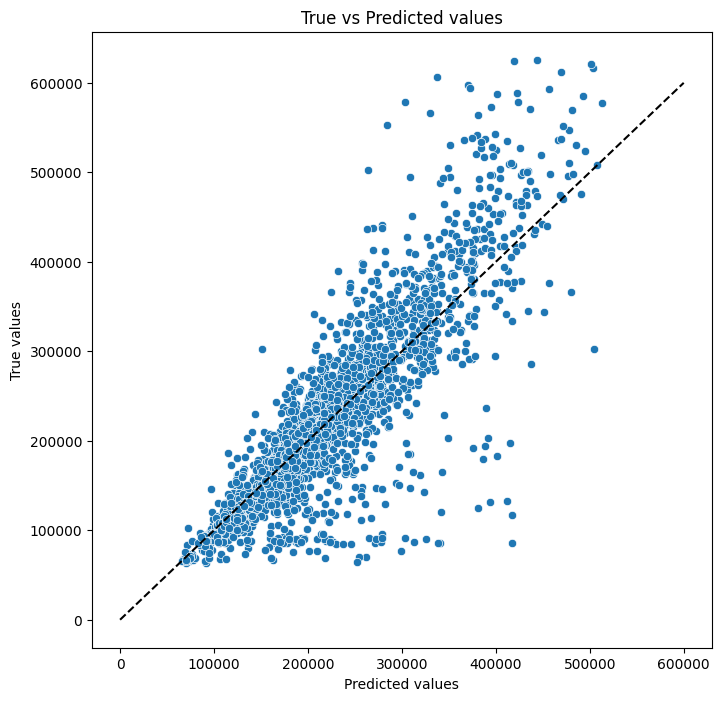

In [35]:
evaluate_preds(y_test, y_pred)

In [36]:
parameters = [{ 'n_estimators': np.arange(100, 1100, 200),  # количество деревьев в лесу
               'max_features': [6],
               'max_depth': [14]}]

In [37]:
clf = GridSearchCV(estimator=RandomForestRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [38]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=21),
             param_grid=[{'max_depth': [14], 'max_features': [6],
                          'n_estimators': array([100, 300, 500, 700, 900])}],
             scoring='r2')

In [39]:
clf.best_params_

{'max_depth': 14, 'max_features': 6, 'n_estimators': 300}

R2:	0.749
MAE:	28757.971
MSE:	2236501486.714


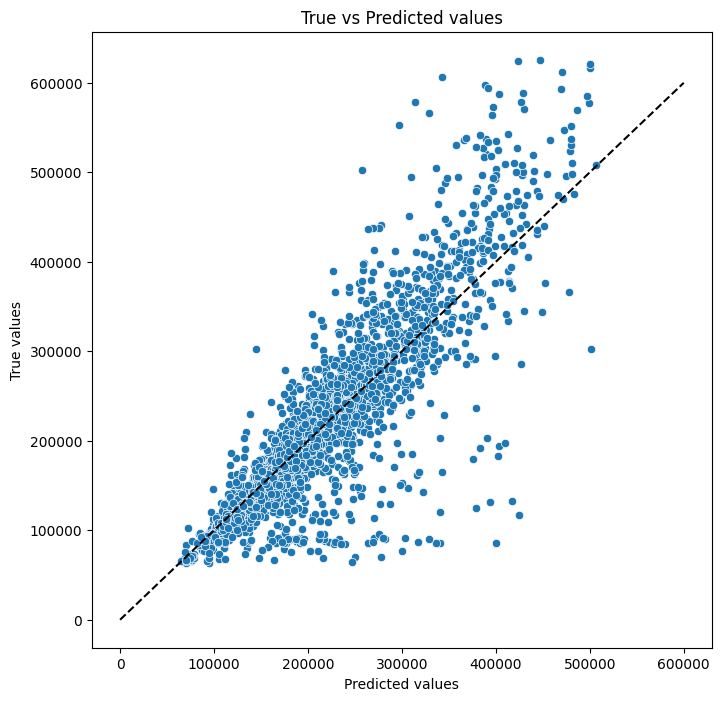

In [40]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

### Gradient Boosting

In [41]:
parameters = [{ # 'n_estimators': [150, 200, 250],  # количество деревьев в лесу
               # 'max_features': np.arange(2, 9),
               'max_depth': np.arange(3, 15)}]

In [42]:
clf = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)

In [43]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=21),
             param_grid=[{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring='r2')

In [44]:
clf.best_params_

{'max_depth': 6}

R2:	0.752
MAE:	28446.794
MSE:	2211757404.912


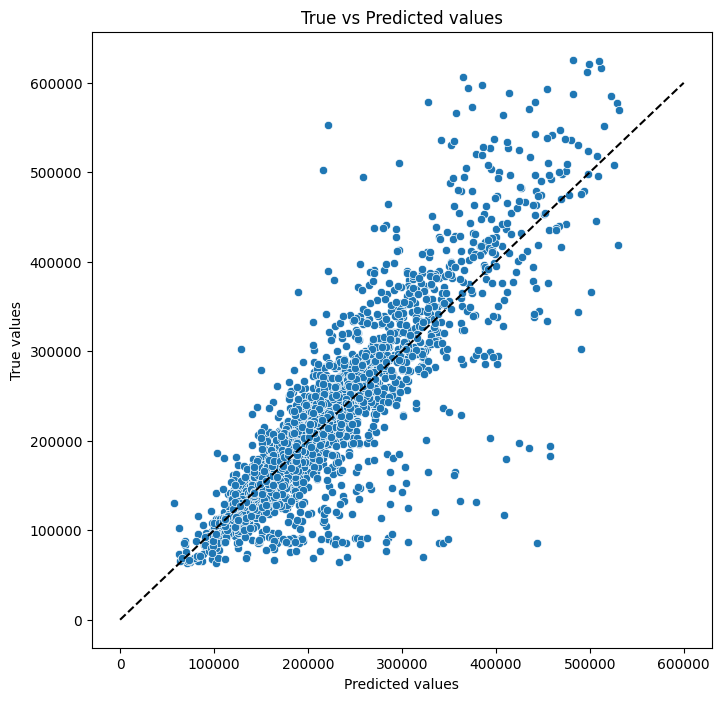

In [45]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

In [46]:
parameters = [{ 'n_estimators': [90],  # количество деревьев в лесу
               'max_features': np.arange(2, 9),
               'max_depth': [6]}]

In [47]:
clf = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)

In [48]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=21),
             param_grid=[{'max_depth': [6],
                          'max_features': array([2, 3, 4, 5, 6, 7, 8]),
                          'n_estimators': [90]}],
             scoring='r2')

In [49]:
clf.best_params_

{'max_depth': 6, 'max_features': 5, 'n_estimators': 90}

R2:	0.757
MAE:	28302.578
MSE:	2161569546.969


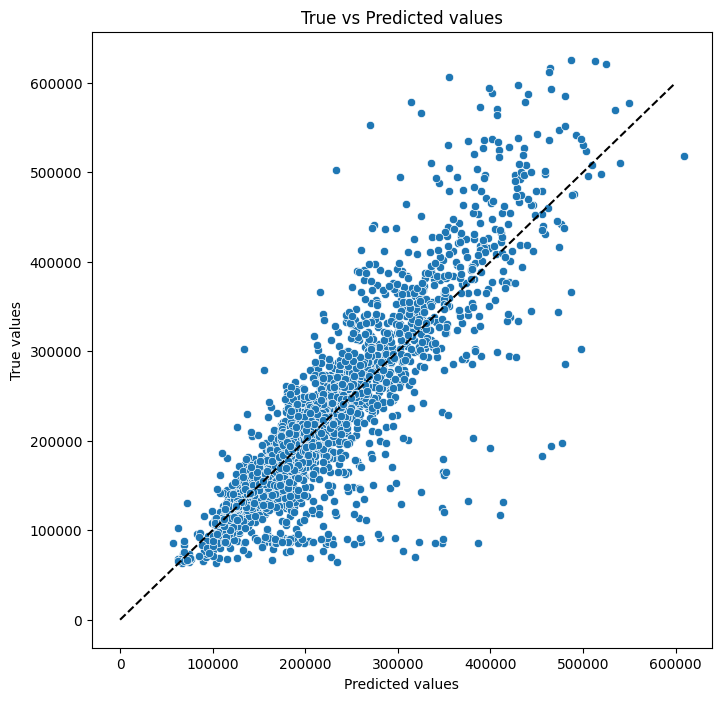

In [50]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

### XGBRegressor

In [51]:
parameters = [{ 'n_estimators': np.arange(10, 1210, 200)
               # 'max_features': np.arange(2, 9),
               # 'max_depth': [6]
               }]

In [52]:
clf = GridSearchCV(estimator=XGBRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)

In [53]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=21, ...),
             param_grid=[{'n_estimators': array([  10,  210,  410,  610,  810, 1010])}],
             scoring='r2')

In [54]:
clf.best_params_

{'n_estimators': 210}

R2:	0.731
MAE:	29659.478
MSE:	2395169040.779


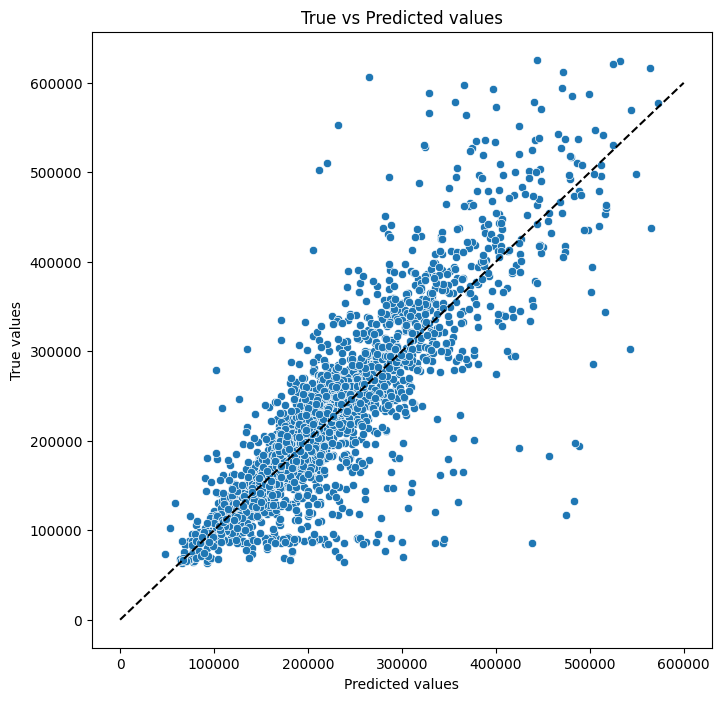

In [55]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

In [57]:
parameters = [{ 'n_estimators': [210],
               # 'max_features': np.arange(2, 9),
               'max_depth': np.arange(4, 19)
               }]

In [58]:
clf = GridSearchCV(estimator=XGBRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)

In [59]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=21, ...),
             param_grid=[{'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
                          'n_estimators': [210]}],
             scoring='r2')

In [60]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 210}

R2:	0.743
MAE:	29157.634
MSE:	2290203136.875


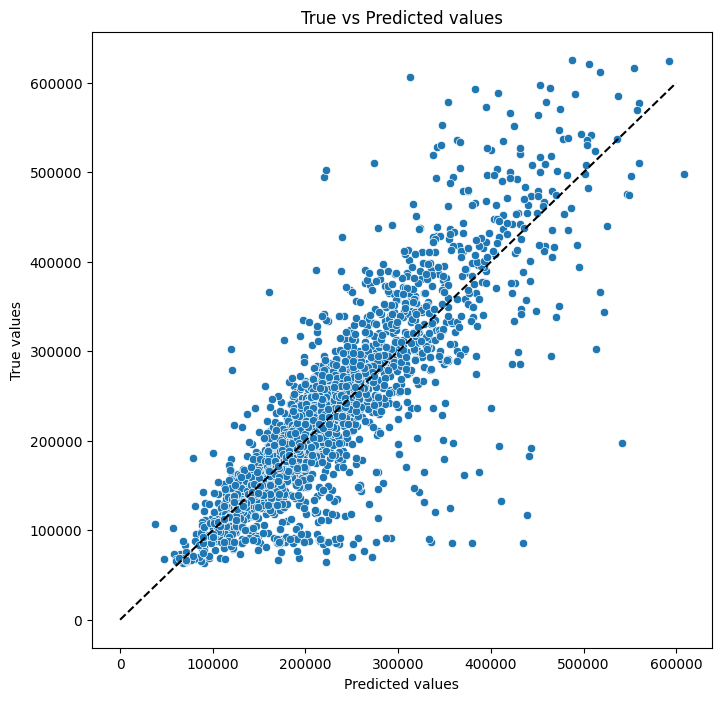

In [61]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

In [62]:
parameters = [{ 'n_estimators': [210],
            
               'max_depth': [5]
               }]

In [63]:
clf = GridSearchCV(estimator=XGBRegressor(random_state=21),
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)

In [64]:
clf.fit(x_train, y_train)


[01:02:35] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



KeyboardInterrupt: 